In [257]:
#pip install tensorflow

In [258]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import cv2


In [259]:
annotation = pd.read_csv("C:\\Users\\Siddhi\\CS50\\CS50AI\\RBC_Mg\\db\\annotations.csv")
annotation.head()


,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [260]:
annotation.columns

Index(['image', 'xmin', 'ymin', 'xmax', 'ymax', 'label'], dtype='object')

In [261]:
rbc = annotation[annotation['label']== 'rbc']
rbc.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [262]:
avg_x = rbc[['xmin','xmax']].mean()
avg_x

xmin    103.710685
xmax    150.920272
dtype: float64

In [263]:
avg_y = rbc[['ymin','ymax']].mean()
avg_y

ymin    103.472994
ymax    150.392324
dtype: float64

In [264]:
img_path = "C:\\Users\\Siddhi\\CS50\\CS50AI\\RBC_Mg\\db\\images\\image-1.png"
img = cv2.imread(img_path)

<function matplotlib.pyplot.show(close=None, block=None)>

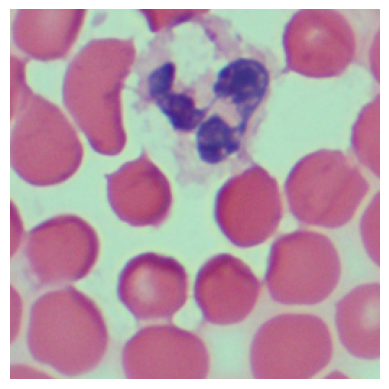

In [265]:
#just the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show

In [266]:
annotation.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [267]:
#get height and width of the rbc from image
total_width = 0
total_height = 0


# this gets me the dimension of RBCs
for index, row in annotation.iterrows():
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'],row['xmax'], row['ymax']
    width = xmax - xmin
    height = ymax - ymin
    #print(f'RBC {index + 1}: Width = {width}, Height = {height}')

    total_width += width
    total_height += height
    
rbc_num = len(annotation)
avg_width = total_width / rbc_num
avg_height = total_height / rbc_num

print(f"AVG Width of RBCs: {avg_width}")
print(f"AVG Height of RBCs: {avg_height}")

AVG Width of RBCs: 49.131903130413136
AVG Height of RBCs: 48.95055445787319


In [268]:
#lets get the outliers
width_threshold = 5
height_threshold = 5

#store the indices in list
outlier_width_indices = []
outlier_height_indices = []

for index, row in annotation.iterrows():
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    width = xmax - xmin
    height = ymax - ymin

    #add them it'll be easier to plot those
    annotation.at[index, 'width'] = width
    annotation.at[index, 'height'] = height

    #lets check the differences
    if abs(width - avg_width) > width_threshold:
        outlier_width_indices.append(index)

    if abs(height - avg_height) > height_threshold:
        outlier_height_indices.append(index)

#combine the same index
outlier_index = set(outlier_width_indices + outlier_height_indices)
outlier_index = list(outlier_index)


#GET THEMMMMM!!!!!!!1
outlier_rows = annotation.loc[outlier_index]
outlier_rows.count()
#print('OUTLIERS ARE: ')
#print(outlier_index)



image     2024
xmin      2024
ymin      2024
xmax      2024
ymax      2024
label     2024
width     2024
height    2024
dtype: int64

In [269]:
non_outlier_rows = annotation.drop(outlier_index)
non_outlier_rows.count()

image     316
xmin      316
ymin      316
xmax      316
ymax      316
label     316
width     316
height    316
dtype: int64

In [270]:
annotation.head()

,image,xmin,ymin,xmax,ymax,label,width,height
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc,25.190198,40.816803
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc,53.326721,23.527421
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc,53.357060,57.714119
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc,64.682614,44.529755
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc,54.453909,51.515753


In [271]:
annotation.count()

image     2340
xmin      2340
ymin      2340
xmax      2340
ymax      2340
label     2340
width     2340
height    2340
dtype: int64

In [272]:
outlier_rows.count()

image     2024
xmin      2024
ymin      2024
xmax      2024
ymax      2024
label     2024
width     2024
height    2024
dtype: int64

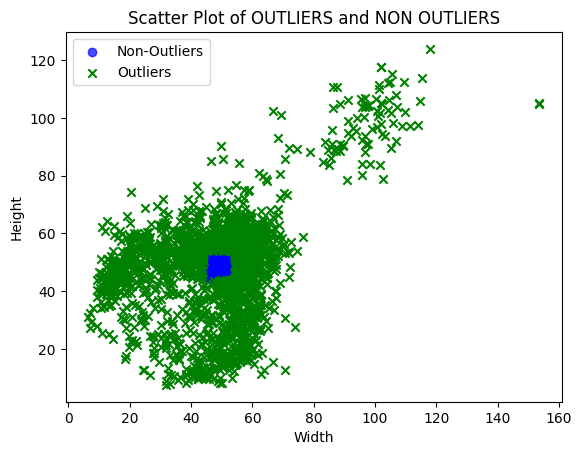

In [273]:
#NON OUTLIERS IN BLUE!!
plt.scatter(non_outlier_rows['width'], non_outlier_rows['height'], label='Non-Outliers', color='blue', alpha=0.7)

# OUTLIERS IN RED!!!!!
plt.scatter(outlier_rows['width'], outlier_rows['height'], label='Outliers', color='green', marker='x')

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of OUTLIERS and NON OUTLIERS')
plt.legend()
plt.show()

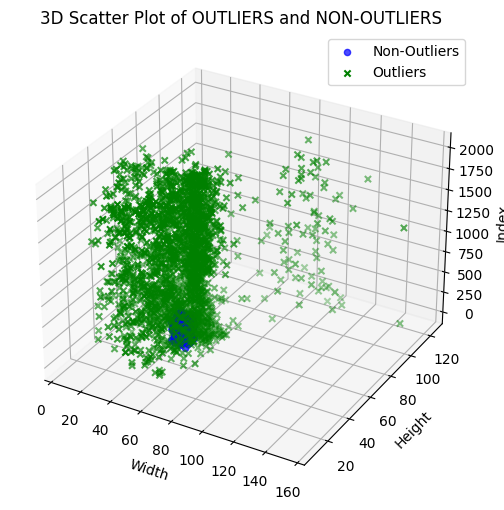

In [274]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot non-outliers in blue
ax.scatter(non_outlier_rows['width'], non_outlier_rows['height'], range(len(non_outlier_rows)),
           label='Non-Outliers', color='blue', alpha=0.7)

# Plot outliers in red
ax.scatter(outlier_rows['width'], outlier_rows['height'], range(len(outlier_rows)),
           label='Outliers', color='green', marker='x')

ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Index')  # Using index as the third dimension
ax.set_title('3D Scatter Plot of OUTLIERS and NON-OUTLIERS')
ax.legend()

plt.show()

In [275]:
mg = pd.read_csv('C:\\Users\\Siddhi\\CS50\\CS50AI\\RBC_Mg\\mg.csv')

In [276]:
mg.columns

Index(['index', 'NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal',
       'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)',
       'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)',
       'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
       'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)',
       'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)',
       'Food_Folate_(µg)', 'Folate_DFE_(µg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_(µg)',
       'Alpha_Carot_(µg)', 'Beta_Carot_(µg)', 'Beta_Crypt_(µg)',
       'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)', 'Vit_D_µg', 'Vit_D_IU',
       'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)',
       'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2',
       'Refuse_Pct'],
      dtype='object')

In [277]:
mg.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [278]:
mg_columns = [col for col in mg.columns if 'mg' in col]


In [279]:
mg_columns

['Calcium_(mg)',
 'Iron_(mg)',
 'Magnesium_(mg)',
 'Phosphorus_(mg)',
 'Potassium_(mg)',
 'Sodium_(mg)',
 'Zinc_(mg)',
 'Copper_mg)',
 'Manganese_(mg)',
 'Vit_C_(mg)',
 'Thiamin_(mg)',
 'Riboflavin_(mg)',
 'Niacin_(mg)',
 'Panto_Acid_mg)',
 'Vit_B6_(mg)',
 'Choline_Tot_ (mg)',
 'Vit_E_(mg)',
 'Cholestrl_(mg)']

In [280]:
mg.dtypes

index                  int64
NDB_No                 int64
Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE     

In [281]:
mg.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [282]:
other_cols = ['index','NDB_No','Shrt_Desc']
mg_food_cols = other_cols + mg_columns 

df = mg[mg_food_cols]

In [283]:
df.columns

Index(['index', 'NDB_No', 'Shrt_Desc', 'Calcium_(mg)', 'Iron_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)',
       'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Choline_Tot_ (mg)', 'Vit_E_(mg)', 'Cholestrl_(mg)'],
      dtype='object')

In [284]:
df.head()

,index,NDB_No,Shrt_Desc,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),...,Manganese_(mg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Choline_Tot_ (mg),Vit_E_(mg),Cholestrl_(mg)
0,0,1001,"BUTTER,WITH SALT",24.0,0.02,2.0,24.0,24.0,643.0,0.09,...,0.000,0.0,0.005,0.034,0.042,0.110,0.003,18.8,2.32,215.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",23.0,0.05,1.0,24.0,41.0,583.0,0.05,...,0.001,0.0,0.007,0.064,0.022,0.097,0.008,18.8,1.37,225.0
2,2,1003,"BUTTER OIL,ANHYDROUS",4.0,0.00,0.0,3.0,5.0,2.0,0.01,...,0.000,0.0,0.001,0.005,0.003,0.010,0.001,22.3,2.80,256.0
3,3,1004,"CHEESE,BLUE",528.0,0.31,23.0,387.0,256.0,1146.0,2.66,...,0.009,0.0,0.029,0.382,1.016,1.729,0.166,15.4,0.25,75.0
4,4,1005,"CHEESE,BRICK",674.0,0.43,24.0,451.0,136.0,560.0,2.60,...,0.012,0.0,0.014,0.351,0.118,0.288,0.065,15.4,0.26,94.0


In [285]:
df = df.drop('index', axis=1)

In [286]:
df.head()

,NDB_No,Shrt_Desc,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Choline_Tot_ (mg),Vit_E_(mg),Cholestrl_(mg)
0,1001,"BUTTER,WITH SALT",24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,0.0,0.005,0.034,0.042,0.110,0.003,18.8,2.32,215.0
1,1002,"BUTTER,WHIPPED,W/ SALT",23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.007,0.064,0.022,0.097,0.008,18.8,1.37,225.0
2,1003,"BUTTER OIL,ANHYDROUS",4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.001,0.005,0.003,0.010,0.001,22.3,2.80,256.0
3,1004,"CHEESE,BLUE",528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,0.0,0.029,0.382,1.016,1.729,0.166,15.4,0.25,75.0
4,1005,"CHEESE,BRICK",674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,0.0,0.014,0.351,0.118,0.288,0.065,15.4,0.26,94.0


In [287]:
#standardize all the features
from sklearn.preprocessing import StandardScaler

def get_food_recommendations(df,mg_columns, num_recommendations=1):
    random_indices = np.random.choice(df.index, size=num_recommendations, replace= False)
    scaler = StandardScaler()
    standardize_data = scaler.fit_transform(df[mg_columns])

    standardize_df = pd.DataFrame(standardize_data, columns=mg_columns, index= df.index)

    #get random recommendations now
    recommendations = standardize_df.loc[random_indices]
    
    return  random_indices

In [300]:
import webbrowser

foo = get_food_recommendations(df, mg_columns, num_recommendations=3)
#print(foo)
food = list(df.loc[foo, 'Shrt_Desc'])

all_ingredients = [ingredient for food in food for ingredient in food.split(', ')]
print(all_ingredients)

webbrowser_url = "https://cookpad.com/in/search/" + ''.join(all_ingredients[2]) + '?event=search.typed_query'
webbrowser.open(webbrowser_url)


['SALAD DRSNG,FRENCH,CTTNSD,OIL,HOME RECIPE', 'BABYFOOD,POTATOES,TODDLER', "MCDONALD'S,HASH BROWN"]


True